보혜사 곧 아버지께서 내 이름으로 보내실 성령 그가 너희에게 모든 것을 가르치고 내가 너희에게 말한 모든 것을 생각나게 하리라
평안을 너희에게 끼치노니 곧 나의 평안을 너희에게 주노라 내가 너희에게 주는 것은 세상이 주는 것과 같지 아니하니라 너희는 마음에 근심하지도 말고 두려워하지도 말라 (요14:26-27)

-------


<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/LectureNotes_ML.png?raw=true" width=1000></center>

__NOTE:__ The following materials have been compiled and adapted from the numerous sources including my own. Please help me to keep this tutorial up-to-date by reporting any issues or questions. Send any comments or criticisms to `idebtor@gmail.com` Your assistances and comments will be appreciated.

<b style="font-size:30px"> 신경망을 내 손으로 만져보기 </b>   
<b style="font-size:24px"> 제 2 강 XOR 인공신경망(tf.keras)</b>

2000년대에 들어서면서 인공 신경망은 2012년 ILSVRC2012 대회에서 인공 신경망을 깊게 쌓은 딥러닝 모델인 AlexNet이 압도적인 성적으로 우승하면서 다시금 주목받게 되었습니다. 이렇게 인공 신경망에 기반을 둔 딥러닝이 다시 주목받게 된 계기가 되었습니다. 

인공 지능의 발전사에서 약간의 의미가 있었던 XOR 문제는 이제 어렵지 않게 풀어볼 수 있게 되었습니다. 여기서는 텐서플로를 이용하여 이 문제에 접근하도록 하겠습니다. 

__텐서플로__   
텐서플로는 구글이 만든 딥러닝 라이브러리로 매우 인기가 좋습니다. CPU와 GPU를 사용해 인공신경망 모델을 효율적으로 훈련하며, 모델 구축에 필요한 서비스와 다양한 도구를 제공합니다. 

텐서플로 2.0부터는 신경망 모델을 빠르게 구성할 수 있는 케라스(Keras)를 핵심 API로 제공합니다. 케라스를 사용하면 간단한 모델에서 아주 복잡한 모델까지 손쉽게 만들 수 있습니다. 

# XOR 연산 다층 신경망을 텐서플로로 다루기


<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/ai4all-xor.png?raw=true" width="500"></center>
<center>그림 1:  XOR 연산을 위한 다층 인공 신경망</center>


텐서플로를 주피터 노트북 내에서 사용하려면, 텐서플로 라이브러리를 import해야 합니다. 
- tensorflow을 import하면, __tensorflow__라는 긴 이름을 대신 짧은 이름 __tf__를 사용할 수 있도록 다음과 같이 import하고, version도 체크할 수 있습니다. tensorflow는 2.x 버전을 사용합니다. 

In [13]:
import tensorflow as tf
print(tf.__version__)

2.3.0


XOR 연산을 위한 2단의 Dense Layer로 구성하였습니다. Dense는 기본적인 레이어로, 입력과 출력 사이에 있는 모든 뉴런이 서로 연결되어 있는 레이어입니다. Dense Layer는 아래와 같이 선언이 가능합니다.

```
tf.keras.layers.Dense()
```

## __Dense(밀집층):__  
밀집층은 가장 간단한 인공신경망 층(layer)입니다. 인공신경망에는 여러 종류의 층이 있습니다. 밀집층에서는 뉴론들이 모두 연결되어 있기 때문에 __완전 연결 층__ (fully connected layer)이라고도 부릅니다. 특별히 밀집층을 사용할 때는 분류하려는 클래스와 동일한 개수의 뉴론을 사용합니다. 

각각의 Layer는 순차적으로 배치되어있습니다. 이를 Sequential 신경망이라고 합니다. 이것은 아래와 같이 선언합니다.
```
tf.keras.Sequential()
```

## __Sequential:__    
씨퀜셜은 케라스에서 신경망을 만드는 모델입니다.   
이 클래스의 객채를 생성할 때, 신경망 모델에 추가할 층을 지정할 수 있습니다. 추가할 층이 한 개이상일 경우 파이썬 리스트로 전달합니다. 

여기서는 Sequential() Dense Layer를 2층으로 쌓도록 합니다.

In [45]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)), 
    tf.keras.layers.Dense(1, activation='sigmoid') 
])


순차적인 신경망안에 두개의 Dense Layer를 배치하고, 첫번째 Dense Layer는 2개의 뉴런을 선언하였고, 각 뉴런은 sigmoid를 활성화 함수로 사용하도록 설정합니다. 입력 값은 두개이므로 모양이 (2,) 모양입니다. 두번째 Dense Layer는 1개의 뉴런을 선언합니다. 

## __활성화 함수:__

sigmoid 함수는 실수 입력을 받아 0와 1사이의 출력으로 변환하며, tanh는 삼각함수 중 탄젠트 함수와 연관이 있으며 실수 입력을 받아 -1과 1 사이의 출력을 반환합니다.

다음과 같은 다양한 활성화 함수를 참조하십시오.

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/activation_functions.png?raw=true" width="600"></center>
<center>그림 2: 다양한 활성화 함수들</center>

XOR연산이므로, 입력 x와 출력(레이블, 타깃) y값은 다음과 같습니다.

In [46]:
import numpy as np

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

## __compile()__  

`compile()`은 모델 객체를 만든 후 훈련하기 전에 사용할 최적화 함수(optimizer) 곧 손실 함수와 측정 지표 등을 지정하는 메소드입니다. loss 매개변수에 손실 함수를 지정하는 방식입니다.   

분류 문제에는 크로스 엔트로피(Cross Entropy)를 사용하며, 선형 회귀에서는 제곱오차(mse: Mean Squared Error)를 사용합니다. 

- 이진 분류를 위한 손실함수로는 `binary_crossentropy`를 사용하며, 
- 다중 분류를 위해서는 `categorical_crossentropy`를 사용하며, 
- 클래스 레이블이 정수일 경우 `sparse_categorical_crossentropy`로 지정합니다. 

회귀 모델일 경우, `mse`, `mean_squared_error` 등을 지정할 수 있습니다. 
여기 예제는, `mse`, `mean_squared_error` 혹은 `binary_corssentropy` 모두 사용 가능합니다. 

`metrics` 매개변수에 훈련 과정에서 측정하고 싶은 지표를 지정할 수 있습니다. 측정 지표가 한 개 이상일 경우 리스트로 전달합니다. 

In [48]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.05), # 'Adam', 'Adagrad', 'RMSprop', 'SGD', ...
    loss = 'mse',                                           # 'mean_squared_error' 'binary_crossentropy'
    metrics = ['accuracy'])

tf.keras에서는 다양한 최적화 함수와 손실 함수를 제공합니다. 

그 중에서도 SGD(Stochastic Gradient Descent)는 확률적 경사 하강법이라고 합니다. 경사 하강법은 앞선 포스팅에서 설명하였고, 이 경사 하강법을 한번에 계산(전체 데이터세트를 사용)하지 않고 확률을 이용하여 부분적으로 나눠서 계산을 한다는 의미입니다. Keras는 디폴트로  옵티마이저로 `Adam`을 사용합니다. 

## __SGD(Stochastic Gradient Descent):__ 확률적 경사하강법

- 기존의 경사 하강법은 데이터세트의 크기가 너무 커지면 계산이 오래 걸리는 단점이 있었습니다.
- SGD는 반복당 하나의 데이터(Batch=1)만을 사용하여 적은 계산으로 기울기를 얻어내는 방식입니다.
- 단점: 반복이 충분하면 효과는 좋지만, 노이즈가 심합니다. 최저점을 찾는다는 보장이 없습니다. 가능성만 높을 뿐입니다.
- 위의 단점을 극복하기 위해서 __미니 배치 SGD__ 가 있습니다. 배치를 너무 크게도 너무 작게도 잡지 않고 SGD보다 노이즈는 적게, 일반 경사 하강법보다는 효율적으로 찾는 방식입니다. 

최적화 함수 SGD(확률적 경사하강법)외에 다음과 같은 다양한 최적화 함수들도 참고하십시오. 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/optimizers.png?raw=true" width="500"></center>
<center>그림 3: 다양한 최적화 함수들(출처: 하용호, "자습해도 모르겠던 딥러닝")</center>

손실 함수(Loss Function)은 RMSE의 제곱인 MSE를 사용하기로 합니다.

아래와 같이, summary() 메소드를 사용하여 형성된 신경망의 구조를 살펴볼 수 있습니다.

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


파라미터는 첫번째 Layer에서 입력값에 가중치가 곱해지고 편향이 더해져서 은닉층의 각 노드에 3개의 파라미터가 전달되어 총 6개입니다. 두번째 Layer에서는 첫 Layer에서 나온 출력 값 두개와 편향을 합쳐서 총 3개의 값이 두번째 층에 전달되어 결과적으로 하나의 출력(예측) 값이 나오게 됩니다.

## __model.fit()__

`model.fit()`은 모델을 실제로 학습하는 단계입니다.

첫 번째에 입력 데이터(x), 두번 째 매개변수에 레이블(타겟 데이터), 기대 출력(y)을 넣고 epoch(전체 데이터셋에 대한 학습 반복 횟수)와 batch_size(훈련 데이터의 수)를 정합니다.

In [51]:
out = model.fit(x, y, epochs = 10000, batch_size = 1, verbose = 0)
print(model.evaluate(x, y))

1/1 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
[0.002346532419323921, 1.0]


학습을 진행하면 위와 같은 출력이 나오며, 손실 값을 알려줍니다. 손실 값은 학습을 진행할수록 0에 가까워지는 것을 확인할 수 있습니다.

## __model.predict()__  

이제 제대로 학습이 되었는지 확인해봅니다. 아래의 코드를 통해서 x에 대한 예측 값을 출력 받을 수 있습니다.


__Expected Output(Approximately):__
```
[[0.02664447]
 [0.96555877]
 [0.972244  ]
 [0.03002012]]
 ```

In [52]:
print(model.predict(x))

[[0.04168159]
 [0.9539638 ]
 [0.95392084]
 [0.05836228]]


`predict()`의 결과값을 소숫점으로 표시하지 않고, 원래의 클래스 레이블 즉 0, 1로 나타내십시오. 

__Expected Output:__
```
[[0]
 [1]
 [1]
 [0]]
 ```

In [53]:
print(model.predict_classes(x))   # may produce 'deprecated' method

[[0]
 [1]
 [1]
 [0]]


만약, 위의 코드의 실행 결과로 Deprecation WARNING이 나온다면, 그 경고를 참고하여, 새롭게 코드를 수정하십시오. 
__Expected Output:__
```
[[0]
 [1]
 [1]
 [0]]
 ```

In [54]:
# 다음과 같은 코드를 사용하면 경고(predict_classes) 메시지를 피할 수 있습니다. 
print((model.predict(x) > 0.5).astype("int"))

[[0]
 [1]
 [1]
 [0]]


정답은 0, 1, 1, 0 순서입니다. 각각 0과 1에 해당하는 수에 가깝게 나오고 있는것을 확인 할 수 있습니다. 이는 학습을 더 많이 할수록 더 정답에 해당하는 수치로 갈것 입니다.

## 가중치와 편향을 확인하기

이제는 `model.weights`에 저장되어 있는 가중치와 편향 값을 확인해봅니다. 

입력과 레이어 또는 레이어 사이의 뉴런을 연결할 때 사용되는 가중치는 kernel이고, 편향과 연결된 가중치는 bias로 표시됩니다. 보통 네트워크의 가중치 숫자가 많기 때문에 구분을 위해 편의상 가중치에 첨자를 붙여서 표시합니다. 레이어의 순서대로 위첨자를 붙이고, 아래첨자는 각 뉴런의 순서에 맞게 차례로 붙입니다. 

그런데, 여기서, 뉴런의 개수가 3개, 레이어 개수가 2개뿐이지만, 이 가중치들이 무슨 일을 하는지 한눈에 잘 들어오지 않습니다. 뉴런과 레이어가 많아지면 이 문제는 더욱 커집니다.

In [55]:
model.weights

[<tf.Variable 'dense_6/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[-5.69661  , -4.0520787],
        [-5.713996 , -4.055497 ]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(2,) dtype=float32, numpy=array([2.1741698, 5.991045 ], dtype=float32)>,
 <tf.Variable 'dense_7/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-8.211126 ],
        [ 7.8851805]], dtype=float32)>,
 <tf.Variable 'dense_7/bias:0' shape=(1,) dtype=float32, numpy=array([-3.6278107], dtype=float32)>]

## 손실과 정확도를 시각화하기

네트워크의 학습 상황을 더 잘 파악할 수 있는 방법으로 가중치를 살펴보는 것보다는 `history`에 저장되어 있는 결과를 다음과 같이 손실이나 정확도를 시각화하는 것이 바람직합니다. 

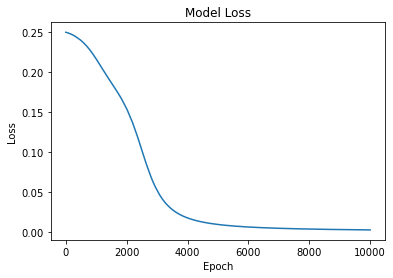

In [56]:
import matplotlib.pyplot as plt

plt.plot(out.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

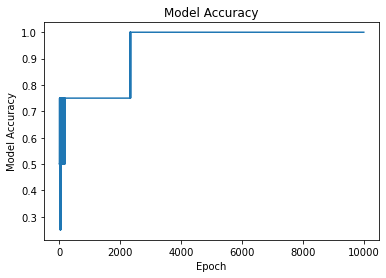

In [57]:
plt.plot(out.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Model Accuracy')
plt.show()

# Your final exam begins here

## Tweaking the model and describe your observation

    - Observe the training performance of the model, accuracies and time (speed) of the convergence and so on.
    - 아래와 같은 실험을 하고, 위의 모델과 비교하거나 관찰한 결과나 과정에 대하여 서술하십시오.  단, 각 문제당 최소 3개부터 최대 6개까지 개조식으로 서술하십시오. 
    
### Increase the number of hidden layers and/or nodes 

### Use two different activation functions for hidden layer

Replace the existing with`sigmoid` with either `relu` or`LeakyReLu`. 
It can be done in keras as follows:
```
from keras.layers import LeakyReLU
act = LeakyReLU(alpha = 0.3)
```
and modify hidden layer as follows:

```
model.add(Dense(units=2,activation=act,input_dim=2))
```
    

### Use two different optimizers (adam, adagrad) and different batch sizes, 1, 2 or 4


Some sample code below are provided for your convenience.

In [5]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(4, activation='relu', input_shape=(2,)), 
    tf.keras.layers.Dense(4, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

In [8]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(12, activation='relu', input_shape=(3,)), 
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

In [9]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

## Questions: 

- Is it possible to solve XOR with no activation function at all, using more neurons or layers? 
- 실험적이거나 이론적인 답의 근거와 이유를 작성하십시오. 

In [ ]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(64, activation='linear', input_shape=(2,)), 
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

In [ ]:
def linear(x):
    '''
    The function returns the variable that is passed in, so all types work.
    '''
    return x

In [ ]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(64, activation='linear', input_shape=(2,)), 
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

In [ ]:
def linear(x):
    '''
    The function returns the variable that is passed in, so all types work.
    '''
    return x

-------
__Be joyful always!__ 1 Thes.5:16